In [1]:
# LeNet-5

%load_ext tensorboard

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, AveragePooling2D, Dropout

In [2]:
num_classes = 2
class LeNet(Sequential):
    def __init__(self, input_shape, nb_classes):
        super().__init__()

        self.add(Input(shape=input_shape))
        self.add(Conv2D(6, kernel_size=(5,5), strides=(1,1), activation='relu', padding='same'))
        self.add(AveragePooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
        self.add(Conv2D(16, kernel_size=(5,5), strides=(1,1), activation='relu', padding='valid'))
        self.add(AveragePooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
        self.add(Flatten())
        self.add(Dense(120, activation='relu'))
        self.add(Dense(84, activation='relu'))
        self.add(Dense(nb_classes, activation='softmax'))

        self.compile(optimizer='adam', loss=categorical_crossentropy, metrics=['accuracy'])

In [3]:
model = LeNet((100,100,3), num_classes)
model.summary()

Model: "le_net"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 100, 100, 6)    │           456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 50, 50, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 46, 46, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 23, 23, 16)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8464)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 120)            │     1,015,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,029,006 (3.93 MB)

 Trainable params: 1,029,006 (3.93 MB)

 Non-trainable params: 0 (0.00 B)

In [4]:
EOPCHS = 100
BATCH_SIZE = 32
image_height = 100
image_width = 100
train_dir = "080263/chap6/data/catanddog/train"
valid_dir = "080263/chap6/data/catanddog/validation"

In [5]:
train = ImageDataGenerator(
    rescale = 1.0/255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1
)

train_generator = train.flow_from_directory(
    train_dir,
    target_size=(image_height, image_width),
    color_mode='rgb',
    batch_size=BATCH_SIZE,
    seed=1,
    shuffle=True,
    class_mode='categorical'
)

valid = ImageDataGenerator(
    rescale = 1.0/255
)

valid_generator = valid.flow_from_directory(
    valid_dir,
    target_size=(image_height, image_width),
    color_mode='rgb',
    batch_size=BATCH_SIZE,
    seed=7,
    shuffle=True,
    class_mode='categorical'
)

train_num = train_generator.samples
valid_num = valid_generator.samples

Found 385 images belonging to 2 classes.
Found 98 images belonging to 2 classes.


In [6]:
log_dir = "080263/chap6/img/log6-1/"
tensorboard_callback = tf.keras.callbacks.TensorBoard(
    log_dir=log_dir,
    histogram_freq=1,
    profile_batch=0
)

model.fit(train_generator,
          epochs=EOPCHS,
          steps_per_epoch=train_num//BATCH_SIZE,
          validation_data=valid_generator,
          validation_steps=valid_num//BATCH_SIZE,
          callbacks=[tensorboard_callback],
          verbose=1)

Epoch 1/100


/opt/miniconda3/envs/py311/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - accuracy: 0.5025 - loss: 0.9827 - val_accuracy: 0.5104 - val_loss: 0.6886
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5625 - loss: 0.6850 - val_accuracy: 0.5000 - val_loss: 0.6950
Epoch 3/100


2024-06-25 07:27:44.829132: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/opt/miniconda3/envs/py311/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)
2024-06-25 07:27:44.834552: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.5278 - loss: 0.6891 - val_accuracy: 0.5000 - val_loss: 0.6896
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6250 - loss: 0.6735 - val_accuracy: 0.0000e+00 - val_loss: 0.7538
Epoch 5/100


2024-06-25 07:27:45.950176: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-25 07:27:45.954169: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.5699 - loss: 0.6842 - val_accuracy: 0.5312 - val_loss: 0.6940
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4062 - loss: 0.7427 - val_accuracy: 0.5000 - val_loss: 0.8552
Epoch 7/100


2024-06-25 07:27:47.013890: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-25 07:27:47.018372: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.6005 - loss: 0.6844 - val_accuracy: 0.6146 - val_loss: 0.6845
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7188 - loss: 0.6665 - val_accuracy: 0.5000 - val_loss: 0.7050
Epoch 9/100


2024-06-25 07:27:48.133028: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-25 07:27:48.137204: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.5804 - loss: 0.6769 - val_accuracy: 0.6042 - val_loss: 0.6911
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6250 - loss: 0.6422 - val_accuracy: 0.5000 - val_loss: 0.6799
Epoch 11/100


2024-06-25 07:27:49.246807: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-25 07:27:49.251505: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.5593 - loss: 0.6729 - val_accuracy: 0.6042 - val_loss: 0.6969
Epoch 12/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6250 - loss: 0.6420 - val_accuracy: 1.0000 - val_loss: 0.5648
Epoch 13/100


2024-06-25 07:27:50.354239: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-25 07:27:50.359109: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - accuracy: 0.5837 - loss: 0.6596 - val_accuracy: 0.5208 - val_loss: 0.6843
Epoch 14/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5625 - loss: 0.6592 - val_accuracy: 1.0000 - val_loss: 0.5964
Epoch 15/100


2024-06-25 07:27:51.523459: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-25 07:27:51.527814: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.6009 - loss: 0.6587 - val_accuracy: 0.6562 - val_loss: 0.6671
Epoch 16/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5625 - loss: 0.6523 - val_accuracy: 0.0000e+00 - val_loss: 0.8795
Epoch 17/100


2024-06-25 07:27:52.682416: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-25 07:27:52.686706: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.6479 - loss: 0.6447 - val_accuracy: 0.5938 - val_loss: 0.6701
Epoch 18/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5625 - loss: 0.6832 - val_accuracy: 0.0000e+00 - val_loss: 0.7198
Epoch 19/100


2024-06-25 07:27:53.807531: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-25 07:27:53.812604: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.6419 - loss: 0.6439 - val_accuracy: 0.6354 - val_loss: 0.6637
Epoch 20/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5625 - loss: 0.6824 - val_accuracy: 0.5000 - val_loss: 0.7236
Epoch 21/100


2024-06-25 07:27:54.957250: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-25 07:27:54.962388: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.6103 - loss: 0.6539 - val_accuracy: 0.5104 - val_loss: 0.6858
Epoch 22/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 0.4487 - val_accuracy: 0.5000 - val_loss: 0.5706
Epoch 23/100


2024-06-25 07:27:56.083586: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-25 07:27:56.088611: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.5057 - loss: 0.6890 - val_accuracy: 0.5625 - val_loss: 0.6678
Epoch 24/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7188 - loss: 0.6433 - val_accuracy: 0.0000e+00 - val_loss: 1.0653
Epoch 25/100


2024-06-25 07:27:57.259185: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-25 07:27:57.264580: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.5937 - loss: 0.6574 - val_accuracy: 0.6042 - val_loss: 0.6727
Epoch 26/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 0.3880 - val_accuracy: 1.0000 - val_loss: 0.3509
Epoch 27/100


2024-06-25 07:27:58.333324: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-25 07:27:58.337963: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.5596 - loss: 0.6897 - val_accuracy: 0.4896 - val_loss: 0.7097
Epoch 28/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6562 - loss: 0.6043 - val_accuracy: 0.5000 - val_loss: 0.6457
Epoch 29/100


2024-06-25 07:27:59.421254: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-25 07:27:59.425386: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.5791 - loss: 0.6417 - val_accuracy: 0.5625 - val_loss: 0.7673
Epoch 30/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5625 - loss: 0.7371 - val_accuracy: 0.5000 - val_loss: 0.9864
Epoch 31/100


2024-06-25 07:28:00.545558: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-25 07:28:00.551076: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.6243 - loss: 0.6974 - val_accuracy: 0.5000 - val_loss: 0.6952
Epoch 32/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6875 - loss: 0.6462 - val_accuracy: 0.5000 - val_loss: 0.7030
Epoch 33/100


2024-06-25 07:28:01.657953: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-25 07:28:01.662583: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.5978 - loss: 0.6589 - val_accuracy: 0.5312 - val_loss: 0.6785
Epoch 34/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6875 - loss: 0.6316 - val_accuracy: 1.0000 - val_loss: 0.4042
Epoch 35/100


2024-06-25 07:28:02.812610: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-25 07:28:02.817884: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.6355 - loss: 0.6443 - val_accuracy: 0.5625 - val_loss: 0.6798
Epoch 36/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6875 - loss: 0.6264 - val_accuracy: 0.5000 - val_loss: 0.7329
Epoch 37/100


2024-06-25 07:28:03.930803: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-25 07:28:03.936679: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.6985 - loss: 0.6315 - val_accuracy: 0.5312 - val_loss: 0.6754
Epoch 38/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6562 - loss: 0.6254 - val_accuracy: 0.5000 - val_loss: 0.6627
Epoch 39/100


2024-06-25 07:28:05.049903: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-25 07:28:05.055685: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.6492 - loss: 0.6606 - val_accuracy: 0.6250 - val_loss: 0.6774
Epoch 40/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6250 - loss: 0.6167 - val_accuracy: 0.5000 - val_loss: 0.8223
Epoch 41/100


2024-06-25 07:28:06.151793: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-25 07:28:06.156769: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.6535 - loss: 0.6230 - val_accuracy: 0.6146 - val_loss: 0.6726
Epoch 42/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5625 - loss: 0.6709 - val_accuracy: 1.0000 - val_loss: 0.4165
Epoch 43/100


2024-06-25 07:28:07.252212: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-25 07:28:07.257456: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - accuracy: 0.6797 - loss: 0.6083 - val_accuracy: 0.5729 - val_loss: 0.6947
Epoch 44/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7812 - loss: 0.5127 - val_accuracy: 1.0000 - val_loss: 0.1786
Epoch 45/100


2024-06-25 07:28:08.406717: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-25 07:28:08.412883: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.6838 - loss: 0.5985 - val_accuracy: 0.5938 - val_loss: 0.7137
Epoch 46/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 0.3331 - val_accuracy: 1.0000 - val_loss: 0.3354
Epoch 47/100


2024-06-25 07:28:09.520847: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-25 07:28:09.524371: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.7138 - loss: 0.5487 - val_accuracy: 0.6667 - val_loss: 0.6934
Epoch 48/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0000e+00 - loss: 0.7068 - val_accuracy: 0.5000 - val_loss: 0.5793
Epoch 49/100


2024-06-25 07:28:10.656829: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-25 07:28:10.661724: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.6600 - loss: 0.6066 - val_accuracy: 0.6354 - val_loss: 0.7458
Epoch 50/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6875 - loss: 0.5923 - val_accuracy: 0.5000 - val_loss: 0.8979
Epoch 51/100


2024-06-25 07:28:11.747789: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-25 07:28:11.753629: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.6375 - loss: 0.6198 - val_accuracy: 0.6250 - val_loss: 0.6785
Epoch 52/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0000e+00 - loss: 0.8229 - val_accuracy: 0.5000 - val_loss: 1.4389
Epoch 53/100


2024-06-25 07:28:12.861101: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-25 07:28:12.865514: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - accuracy: 0.6511 - loss: 0.6370 - val_accuracy: 0.5312 - val_loss: 0.7186
Epoch 54/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7500 - loss: 0.5774 - val_accuracy: 1.0000 - val_loss: 0.3816
Epoch 55/100


2024-06-25 07:28:13.987804: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-25 07:28:13.993475: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - accuracy: 0.7222 - loss: 0.5886 - val_accuracy: 0.6042 - val_loss: 0.7233
Epoch 56/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7500 - loss: 0.5118 - val_accuracy: 1.0000 - val_loss: 0.4789
Epoch 57/100


2024-06-25 07:28:15.140769: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-25 07:28:15.146077: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.7083 - loss: 0.5491 - val_accuracy: 0.5312 - val_loss: 0.7223
Epoch 58/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 0.6798 - val_accuracy: 0.5000 - val_loss: 0.5361
Epoch 59/100


2024-06-25 07:28:16.247324: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-25 07:28:16.252585: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.7228 - loss: 0.5398 - val_accuracy: 0.6042 - val_loss: 0.6780
Epoch 60/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7188 - loss: 0.5969 - val_accuracy: 0.5000 - val_loss: 1.0387
Epoch 61/100


2024-06-25 07:28:17.421154: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-25 07:28:17.426884: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.6780 - loss: 0.5771 - val_accuracy: 0.6146 - val_loss: 0.6701
Epoch 62/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6250 - loss: 0.6275 - val_accuracy: 1.0000 - val_loss: 0.4276
Epoch 63/100


2024-06-25 07:28:18.578265: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-25 07:28:18.583167: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.7506 - loss: 0.5388 - val_accuracy: 0.6771 - val_loss: 0.6725
Epoch 64/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5625 - loss: 0.6513 - val_accuracy: 1.0000 - val_loss: 0.3710
Epoch 65/100


2024-06-25 07:28:19.725815: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-25 07:28:19.732388: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.7206 - loss: 0.5239 - val_accuracy: 0.6458 - val_loss: 0.7144
Epoch 66/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6875 - loss: 0.5995 - val_accuracy: 1.0000 - val_loss: 0.3341
Epoch 67/100


2024-06-25 07:28:20.886604: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-25 07:28:20.892734: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.7434 - loss: 0.4832 - val_accuracy: 0.6354 - val_loss: 0.8223
Epoch 68/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7500 - loss: 0.4448 - val_accuracy: 0.5000 - val_loss: 0.6354
Epoch 69/100


2024-06-25 07:28:22.021549: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-25 07:28:22.028034: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 0.6368 - loss: 0.6161 - val_accuracy: 0.7083 - val_loss: 0.7340
Epoch 70/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6562 - loss: 0.5777 - val_accuracy: 0.5000 - val_loss: 0.5609
Epoch 71/100


2024-06-25 07:28:23.195807: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-25 07:28:23.202800: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.6960 - loss: 0.5875 - val_accuracy: 0.6458 - val_loss: 0.6731
Epoch 72/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6562 - loss: 0.5431 - val_accuracy: 0.5000 - val_loss: 0.6165
Epoch 73/100


2024-06-25 07:28:24.367479: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-25 07:28:24.373935: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.7717 - loss: 0.4891 - val_accuracy: 0.6458 - val_loss: 0.6470
Epoch 74/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7812 - loss: 0.4773 - val_accuracy: 1.0000 - val_loss: 0.3831
Epoch 75/100


2024-06-25 07:28:25.540397: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-25 07:28:25.545285: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.7228 - loss: 0.5159 - val_accuracy: 0.5938 - val_loss: 0.7737
Epoch 76/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7500 - loss: 0.5294 - val_accuracy: 0.5000 - val_loss: 0.7022
Epoch 77/100


2024-06-25 07:28:26.690961: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-25 07:28:26.697825: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.7453 - loss: 0.5171 - val_accuracy: 0.6875 - val_loss: 0.7483
Epoch 78/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 0.2558 - val_accuracy: 1.0000 - val_loss: 0.3452
Epoch 79/100


2024-06-25 07:28:27.843869: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-25 07:28:27.848869: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.7730 - loss: 0.4832 - val_accuracy: 0.5729 - val_loss: 0.8771
Epoch 80/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6250 - loss: 0.7657 - val_accuracy: 0.0000e+00 - val_loss: 1.1682
Epoch 81/100


2024-06-25 07:28:29.001753: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-25 07:28:29.007757: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.7666 - loss: 0.4963 - val_accuracy: 0.6458 - val_loss: 0.7454
Epoch 82/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5938 - loss: 0.6087 - val_accuracy: 1.0000 - val_loss: 0.5438
Epoch 83/100


2024-06-25 07:28:30.135041: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-25 07:28:30.141178: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.7214 - loss: 0.5390 - val_accuracy: 0.6458 - val_loss: 0.7545
Epoch 84/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 0.6307 - val_accuracy: 0.5000 - val_loss: 0.5375
Epoch 85/100


2024-06-25 07:28:31.292576: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-25 07:28:31.298643: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.6962 - loss: 0.6072 - val_accuracy: 0.6875 - val_loss: 0.6975
Epoch 86/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8125 - loss: 0.3341 - val_accuracy: 0.0000e+00 - val_loss: 1.8560
Epoch 87/100


2024-06-25 07:28:32.404419: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-25 07:28:32.410298: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.7334 - loss: 0.4966 - val_accuracy: 0.6667 - val_loss: 0.7587
Epoch 88/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8750 - loss: 0.3427 - val_accuracy: 1.0000 - val_loss: 0.2272
Epoch 89/100


2024-06-25 07:28:33.563121: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-25 07:28:33.569114: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.8012 - loss: 0.4209 - val_accuracy: 0.6562 - val_loss: 0.7710
Epoch 90/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8750 - loss: 0.3528 - val_accuracy: 0.5000 - val_loss: 0.6125
Epoch 91/100


2024-06-25 07:28:34.710446: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-25 07:28:34.716719: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.7787 - loss: 0.4477 - val_accuracy: 0.6771 - val_loss: 0.8276
Epoch 92/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8125 - loss: 0.5058 - val_accuracy: 0.5000 - val_loss: 0.8185
Epoch 93/100


2024-06-25 07:28:35.819863: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-25 07:28:35.824829: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.7606 - loss: 0.4707 - val_accuracy: 0.6458 - val_loss: 0.8963
Epoch 94/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6562 - loss: 0.4981 - val_accuracy: 1.0000 - val_loss: 0.1640
Epoch 95/100


2024-06-25 07:28:36.958135: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-25 07:28:36.963614: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.8134 - loss: 0.4292 - val_accuracy: 0.6458 - val_loss: 1.0232
Epoch 96/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6250 - loss: 0.5956 - val_accuracy: 1.0000 - val_loss: 0.2714
Epoch 97/100


2024-06-25 07:28:38.091574: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-25 07:28:38.098411: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.8047 - loss: 0.4657 - val_accuracy: 0.6458 - val_loss: 0.8905
Epoch 98/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6250 - loss: 0.8237 - val_accuracy: 0.5000 - val_loss: 1.0566
Epoch 99/100


2024-06-25 07:28:39.208657: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-25 07:28:39.214482: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.6674 - loss: 0.6154 - val_accuracy: 0.6146 - val_loss: 0.6914
Epoch 100/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7500 - loss: 0.5590 - val_accuracy: 0.5000 - val_loss: 0.5195


2024-06-25 07:28:40.372042: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-25 07:28:40.377196: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


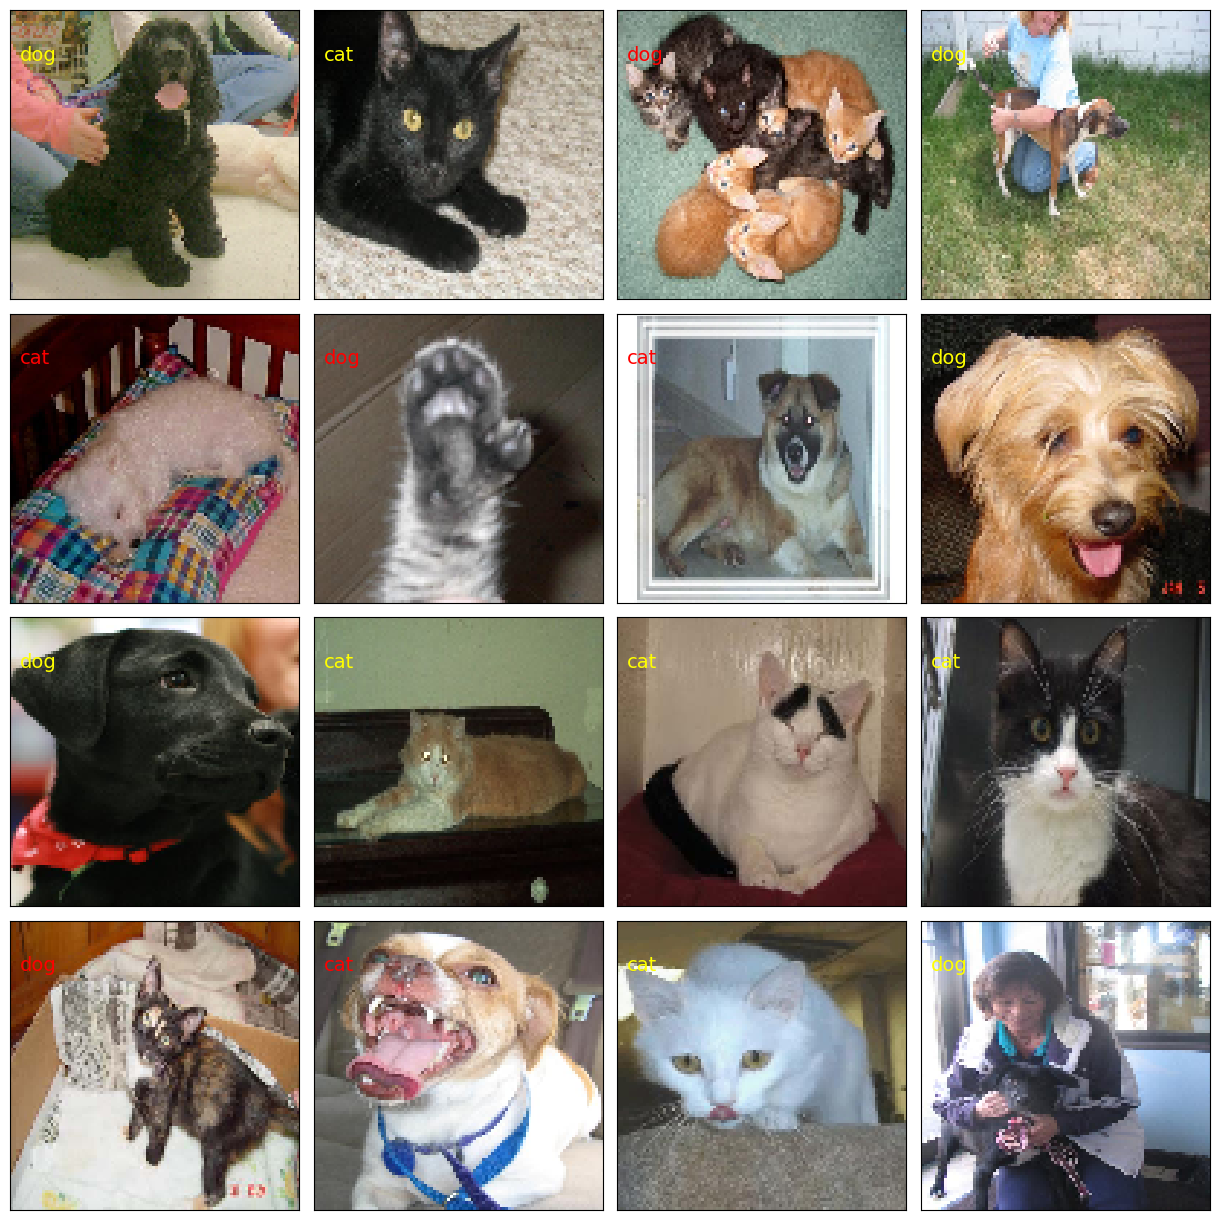

In [25]:
class_names = ['cat', 'dog']
validation, label_batch = next(iter(valid_generator))
prediction_values = model.predict(validation)
prediction_values = np.argmax(prediction_values, axis=1)

fig = plt.figure(figsize=(12,12))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(16):
    ax = fig.add_subplot(4, 4, i+1, xticks=[], yticks=[])
    ax.imshow(validation[i,:], cmap=plt.cm.gray_r, interpolation='nearest')

    if prediction_values[i] == np.argmax(label_batch[i]):
        ax.text(3, 17, class_names[prediction_values[i]], color='yellow', fontsize=14)
    else:
        ax.text(3, 17, class_names[prediction_values[i]], color='red', fontsize=14)

In [ ]:
# AlexNet
